# Cobify challenge

## Cleaning and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('measurements.csv')

In [3]:
data.head(60)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

What the problem amounts to is this: what is the difference in performance between E10 and SP98?

To get a good metric of the performance, I need to first calculate the consumption per mile per speed. I'll divide the consumption (in liters) by the product of the distance and speed.

### Assumptions

Although no metrics are given for most columns, the use of commas for decimals, of the European gas standard E10, and the column name 'refill liters' suggests a European context. So I will assume that **distances are in km** and **volumes are in liters**.

Now, some cleaning.

### Cleaning (first round)

In [5]:
# First, change decimal commas to periods

def comma_to_period(columnname):
    placeholder = []
    for item in data[columnname]:
        placeholder.append(str(item).replace(',', '.'))
    data[columnname] = pd.to_numeric(placeholder)
    return

In [6]:
comma_to_period('consume')

In [7]:
comma_to_period('distance')

In [8]:
## Then deal with NaN values

In [9]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [10]:
## First, 'temp_inside'

In [11]:
data[data['temp_inside'].isna()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
93,12.4,4.7,43,NaN,10,NaN,SP98,0,0,0,NaN,NaN
95,11.8,5.3,52,NaN,11,NaN,SP98,0,0,0,NaN,NaN
97,15.7,5.3,33,NaN,9,NaN,SP98,0,0,0,NaN,NaN
98,12.9,5.7,35,NaN,9,NaN,SP98,0,0,0,NaN,NaN
99,6.4,4.4,37,NaN,10,NaN,SP98,0,0,0,NaN,NaN
100,5.3,4.1,34,NaN,9,NaN,SP98,0,0,0,NaN,NaN
102,18.8,5.0,62,NaN,9,rain,SP98,0,1,0,NaN,NaN
201,22.2,3.8,42,NaN,15,NaN,SP98,0,0,0,NaN,NaN
203,12.6,4.1,33,NaN,17,NaN,SP98,0,0,0,NaN,NaN
261,24.5,3.9,50,NaN,15,sun,E10,0,0,1,NaN,NaN


In [12]:
data['temp_inside'].value_counts()

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

I will interpolate the mode for the 12 NaNs here (so 21.5)

In [13]:
data['temp_inside'] = data['temp_inside'].fillna('21.5')

And convert the decimals again

In [14]:
comma_to_period('temp_inside')

In [15]:
## For the other three columns that contain NaNs, they are all worth dropping:

In [16]:
data['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

Except for the four cases where there was snow, all of these data are already included in other columns (ac, sun, rain). So I can drop it without losing much. 

In [17]:
data.drop(columns = ['specials'], inplace = True)

Finally, *refill liters* and *refill gas* are very sparse columns - only 13 entries for almost 400 rows. So also worth dropping entirely.

In [18]:
data.drop(columns = ['refill liters', 'refill gas'], inplace = True)

In [19]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [20]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.916237,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.997449,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


## First pass at EDA

The very first thing to do is to get better metrics of the overall performance. Not just consumption for each ride, but consumption per km. The standard metric here is km per liter.

In [21]:
data['performance'] = data['distance'] / data['consume'] 

The next thing to do with this freshly cleaned data is to take a look at the most basic descriptive statistics for the measurements with SP98 and those with E10. I'll separate these out into two different dataframes.

In [22]:
e10 = data[data['gas_type'] == 'E10'].copy()

In [23]:
sp98 = data[data['gas_type'] == 'SP98'].copy()

In [24]:
len(e10)

160

In [25]:
len(sp98)

228

They are not terribly imbalanced, though with a dataset this small I might have to adjust the sample sizes later on, if a regression is called for.

In [26]:
np.mean(e10['performance'])

4.471730619659065

In [27]:
np.mean(sp98['performance'])

4.008745071879544

From this first approximation, it appears that the performance with e10 is somewhat better than with sp98:

In [28]:
avg_e10 = np.mean(e10['performance'])
avg_sp98 = np.mean(sp98['performance'])

In [29]:
avg_e10 - avg_sp98

0.46298554777952106

The average performance with e10 is about 0.46 km/liter more than with sp98.

## Second pass at EDA

What happens if we adjust for other factors (speed, temperature, AC)?

In [30]:
speed_e10 = np.mean(e10['speed'])
speed_sp98 = np.mean(sp98['speed'])

In [31]:
speed_e10

43.50625

In [32]:
speed_sp98

40.82017543859649

The average speed with the E10 fuel is higher. What does this mean?

## A plot showing how performance relates to speed 

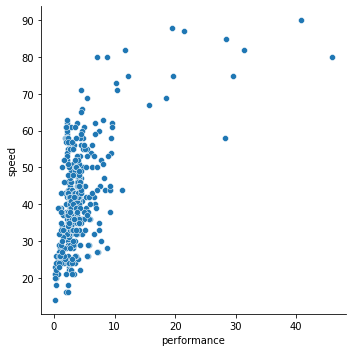

In [33]:
sns.relplot(x = data['performance'], y = data['speed'])

Across fuel types, we get higher performances at higher speeds.

Let's see this for each individual fuel type.

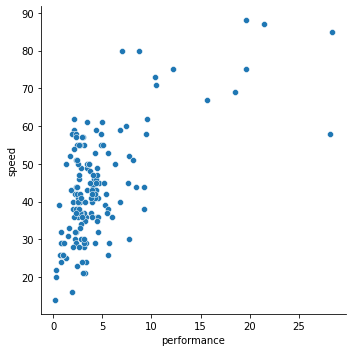

In [34]:
sns.relplot(x = e10['performance'], y = e10['speed'])

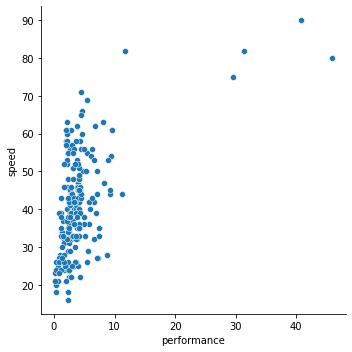

In [35]:
sns.relplot(x = sp98['performance'], y = sp98['speed'])

- Higher speeds give better performance
- The drives with E10 have a better performance than SP98
- The drives with E10 have a higher average speed than those with SP98

What this tells us is that we need to do a more thorough job of adjusting for speed. A regression is called for. 

## Towards a regression

In [36]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,performance
0,28.0,5.0,26,21.5,12,E10,0,0,0,5.600000
1,12.0,4.2,30,21.5,13,E10,0,0,0,2.857143
2,11.2,5.5,38,21.5,15,E10,0,0,0,2.036364
3,12.9,3.9,36,21.5,14,E10,0,0,0,3.307692
4,18.5,4.5,46,21.5,15,E10,0,0,0,4.111111
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,4.324324
384,16.1,4.3,38,25.0,31,SP98,1,0,0,3.744186
385,16.0,3.8,45,25.0,19,SP98,0,0,0,4.210526
386,15.4,4.6,42,25.0,31,SP98,1,0,0,3.347826


The last bit of cleaning to do before a regression is to encode the gas_type column into zero and one.

In [37]:
data['gas_type'] = data['gas_type'].replace('E10', 0)

In [38]:
data['gas_type'] = data['gas_type'].replace('SP98', 1)

And then drop the 'distance' and 'consume' columns, since those are included in the 'performance' metric.

I'm keeping a copy of the dataframe that includes those columns, just in case.

In [40]:
data2 = data.copy()

In [41]:
data.drop(columns = ['distance','consume'], inplace = True)

### X/y split

In [42]:
y = data['performance']
X = data.drop(columns = ['performance'])

### Train/test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standard Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(X_train)

MinMaxScaler()

In [48]:
transformed = scaler.transform(X_train)
X_train = pd.DataFrame(transformed, columns = scaler.get_feature_names_out())

In [49]:
X_train.head()

,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,0.276316,0.461538,0.555556,1.0,0.0,0.0,1.0
1,0.131579,0.384615,0.333333,1.0,0.0,0.0,0.0
2,0.157895,0.384615,0.250000,0.0,0.0,0.0,0.0
3,0.315789,0.461538,0.611111,1.0,0.0,0.0,0.0
4,0.157895,0.384615,0.277778,1.0,0.0,0.0,0.0


In [50]:
testtransformed = scaler.transform(X_test)
X_test = pd.DataFrame(testtransformed, columns = scaler.get_feature_names_out())

In [51]:
X_test.head()

,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,0.184211,0.384615,0.361111,1.0,0.0,0.0,0.0
1,0.315789,0.615385,0.138889,1.0,0.0,1.0,0.0
2,0.131579,0.538462,0.500000,0.0,0.0,0.0,0.0
3,0.394737,0.307692,0.222222,0.0,0.0,0.0,0.0
4,0.342105,0.461538,0.361111,1.0,0.0,0.0,0.0


### Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
reg = LinearRegression()

In [54]:
reg.fit(X_train, y_train)

LinearRegression()

In [55]:
reg.score(X_train, y_train)

0.3650025353897389

In [56]:
reg.score(X_test, y_test)

0.2438761738666102

These are not impressive scores. I'll see what happens when I try this with only speed, outside temperature, and gas type.

### Regression, take 2

In [57]:
X_train2 = X_train.drop(columns = ['temp_inside', 'AC', 'rain', 'sun'])
X_test2 = X_test.drop(columns = ['temp_inside', 'AC', 'rain', 'sun'])

In [58]:
reg2 = LinearRegression()

In [59]:
reg2.fit(X_train2, y_train)

LinearRegression()

In [60]:
reg2.score(X_train2, y_train)

0.35510260744411093

In [61]:
reg2.score(X_test2, y_test)

0.26434295683538056

This gives me about the same result. 

### Regression, take 3

In [62]:
X_train3 = X_train2.drop(columns = ['temp_outside'])
X_test3 = X_test2.drop(columns = ['temp_outside'])

In [63]:
reg3 = LinearRegression().fit(X_train3, y_train)

In [64]:
reg3.score(X_train3, y_train)

0.31030289904916686

In [65]:
reg3.score(X_test3, y_test)

0.29467601258487364

### Conclusions from regression

So far, it seems like there is no convincing correlation between the type of fuel and the performance. The apparent difference in the mean observed above is offset by the difference in the speed. 

To confirm this, I'll run a reverse experiment, and see if the rest of the data can give a good prediction of which fuel type we're dealing with. 

## Experiment: classification

In [68]:
data2.drop(columns = ['performance'], inplace = True)

## X/y split

In [69]:
X = data2.drop(columns = ['gas_type'])
y = data2['gas_type']

In [70]:
X

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0
386,15.4,4.6,42,25.0,31,1,0,0


### Train/test split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Min/max Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
scaler.fit(X_train)

MinMaxScaler()

In [75]:
transformed = scaler.transform(X_train)
X_train = pd.DataFrame(transformed, columns = scaler.get_feature_names_out())

In [76]:
X_train.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,0.126399,0.067416,0.276316,0.461538,0.555556,0.0,0.0,1.0
1,0.047108,0.179775,0.131579,0.384615,0.333333,0.0,0.0,0.0
2,0.014925,0.348315,0.157895,0.384615,0.250000,0.0,0.0,0.0
3,0.044776,0.112360,0.315789,0.461538,0.611111,0.0,0.0,0.0
4,0.011660,0.303371,0.157895,0.384615,0.277778,0.0,0.0,0.0


In [77]:
testtransformed = scaler.transform(X_test)
X_test = pd.DataFrame(testtransformed, columns = scaler.get_feature_names_out())

In [78]:
X_test.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,0.020522,0.348315,0.184211,0.384615,0.361111,0.0,0.0,0.0
1,0.047108,0.146067,0.315789,0.615385,0.138889,0.0,1.0,0.0
2,0.011194,0.235955,0.131579,0.538462,0.500000,0.0,0.0,0.0
3,0.181437,0.123596,0.394737,0.307692,0.222222,0.0,0.0,0.0
4,0.066698,0.056180,0.342105,0.461538,0.361111,0.0,0.0,0.0


## Logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
classifier = LogisticRegression()

In [84]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [86]:
classifier.score(X_train, y_train)

0.632258064516129

In [87]:
classifier.score(X_test, y_test)

0.5256410256410257

This is not a terrible score, but we have to look at the details here.

In [88]:
from sklearn.metrics import confusion_matrix

In [90]:
y_pred = classifier.predict(X_train)

In [91]:
confusion_matrix(y_train, y_pred)

array([[ 28,  97],
       [ 17, 168]])

In [92]:
y_test_pred = classifier.predict(X_test)

In [93]:
confusion_matrix(y_test, y_test_pred)

array([[ 4, 31],
       [ 6, 37]])

What would the most naïve classifier, that predicts SP98 in every single instance, look like?

In [97]:
y_train.value_counts()

1    185
0    125
Name: gas_type, dtype: int64

In [99]:
125+185

310

In [100]:
185 / 310

0.5967741935483871

This is not too far from what our classifier gave us. Again, the conclusion seems to be that there is very limited correlation between fuel type and the other variables. 

# Conclusions

Based on the dataset given, the difference in performance between E10 and SP98 is so marginal as to be negligible. Given that E10 is cheaper and more environmentally friendly, E10 seems like the better choice in terms of performance.

### Limitations and recommendations

- Performance is not the only relevant metric. In particular, we would want more data on how the different fuel types affect the life expectancy of cars. It might be that the increased cost of SP98 is offset by the **decreased maintenance costs** for cars running on SP98. We would advise **additional research** into this aspect as well.

- With only 388 data points for a single car, the given data set is rather limited. **More data would be better.** However, given that the correlation between fuel type and performance in these 388 data points is low, this does not seem like a very promising avenue for research. 